# Step 1: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import tensorflow_datasets as tfds
from keras import layers
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

# Step 2: Loading data

In [ ]:
(train_data, val_data, test_data), metadata = tfds.load(
    'cifar10',
    split=('train[:80%]', 'train[80%:90%]', 'train[90%:]'),
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.0GTC4B_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.0GTC4B_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
train_data.take(1)  # retrieves the first element (or batch) from the dataset

<_TakeDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

# class_names = [
  -   'Airplane', 'Automobile', 'Bird', 'Cat',
  -  'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# View the data

tf.Tensor(7, shape=(), dtype=int64)


Text(0.5, 1.0, 'horse')

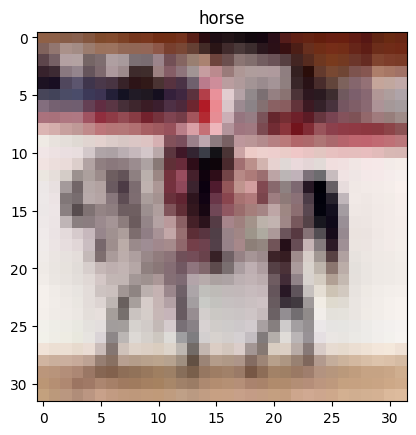

In [ ]:
image, label = next(iter(train_data.take(5)))
plt.imshow(image)
label_name = metadata.features['label'].int2str(label)
# plt.title(str(label.numpy()))
print(label)
plt.title(label_name)

tf.Tensor(7, shape=(), dtype=int64)


Text(0.5, 1.0, 'horse')

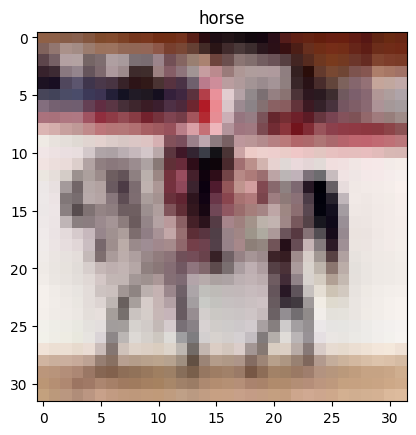

In [ ]:
image, label = next(iter(train_data))
plt.imshow(image)
label_name = metadata.features['label'].int2str(label)
# plt.title(str(label.numpy()))
print(label)
plt.title(label_name)

(32, 32, 3)
tf.Tensor(7, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(8, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(4, shape=(), dtype=int64)


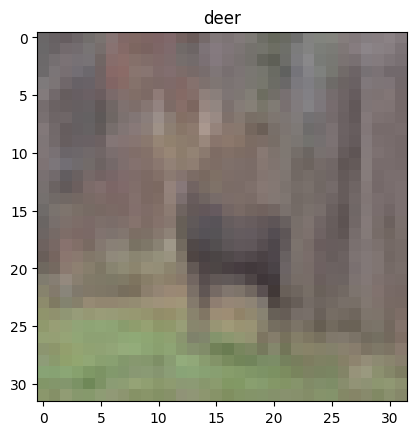

In [ ]:
for image, label in iter(train_data.take(3)):
  print(image.shape)
  print(label)
  plt.imshow(image)
  label_name = metadata.features['label']. int2str(label)
  plt.title(label_name)
  plt.imshow(image)

In [ ]:
# Extract 5 samples from train_data for visualization
images, labels = [], []
for image, label in train_data.take(5):
    print(image.shape)
    print(label)
    label_name = metadata.features['label'].int2str(label)
    print(label_name)
    images.append(image)
    labels.append(label_name)

(32, 32, 3)
tf.Tensor(7, shape=(), dtype=int64)
horse
(32, 32, 3)
tf.Tensor(8, shape=(), dtype=int64)
ship
(32, 32, 3)
tf.Tensor(4, shape=(), dtype=int64)
deer
(32, 32, 3)
tf.Tensor(4, shape=(), dtype=int64)
deer
(32, 32, 3)
tf.Tensor(6, shape=(), dtype=int64)
frog


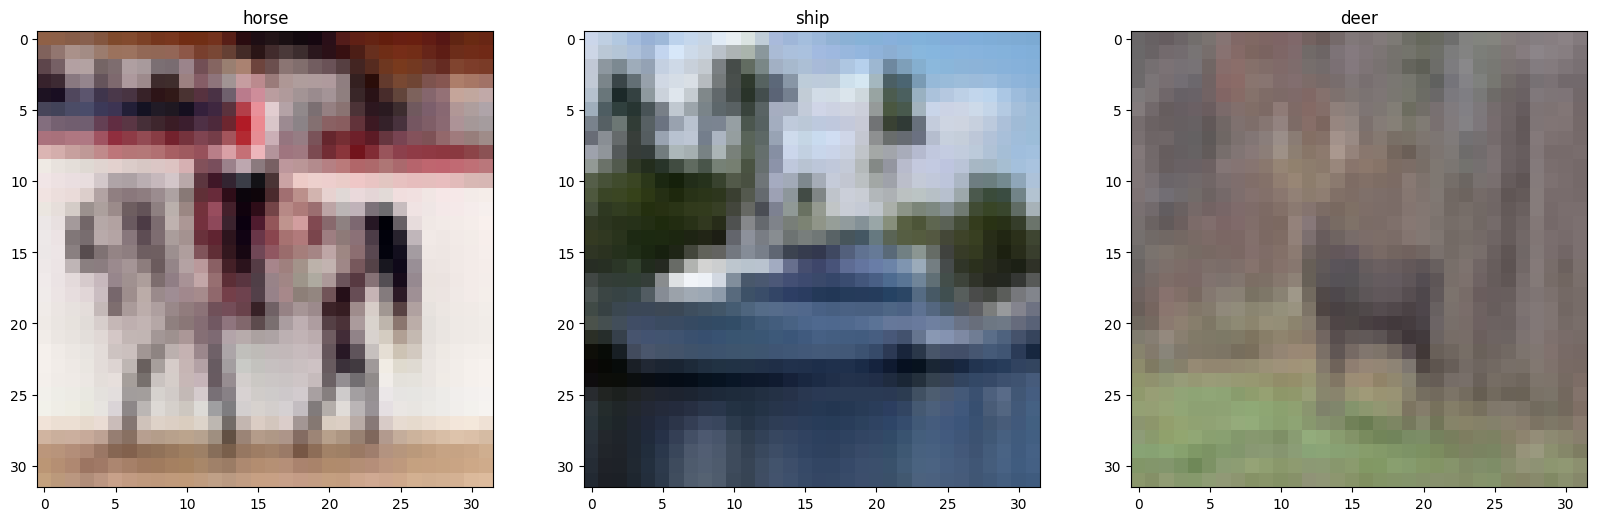

In [ ]:
# Plot the extracted images
fig, ax = plt.subplots(1, 3, figsize=(20, 20))  # This code snippet creates a visualization of three images along with their respective labels using Matplotlib.
for i in range(3):
  ax[i].imshow(images[i])
  ax[i].set_title(labels[i])
plt.show()

# Step 3: Basic Preprocessing

In [ ]:
IMG_SIZE = 32   # CIFAR-10 images are already 32x32
resize_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),  # Ensure consistent size (already 32x32 for CIFAR-10)
    layers.Rescaling(1.0 / 255)          # Normalize pixel values to [0, 1]
])

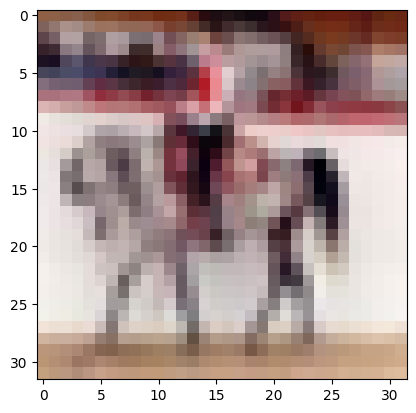

In [ ]:
result = resize_rescale(images[0])
plt.imshow(result)

# Step 4: Data Augmentation

In [ ]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),  # Flip horizontally and vertically
    layers.RandomRotation(0.2),      # Random rotation
    layers.RandomZoom(0.2)           # Random zoom
])

In [ ]:
images[0]   # it refers to accessing the first element of a list or array named images.

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[143,  96,  70],
        [141,  96,  72],
        [135,  93,  72],
        ...,
        [ 96,  37,  19],
        [105,  42,  18],
        [104,  38,  20]],

       [[128,  98,  92],
        [146, 118, 112],
        [170, 145, 138],
        ...,
        [108,  45,  26],
        [112,  44,  24],
        [112,  41,  22]],

       [[ 93,  69,  75],
        [118,  96, 101],
        [179, 160, 162],
        ...,
        [128,  68,  47],
        [125,  61,  42],
        [122,  59,  39]],

       ...,

       [[187, 150, 123],
        [184, 148, 123],
        [179, 142, 121],
        ...,
        [198, 163, 132],
        [201, 166, 135],
        [207, 174, 143]],

       [[187, 150, 117],
        [181, 143, 115],
        [175, 136, 113],
        ...,
        [201, 164, 132],
        [205, 168, 135],
        [207, 171, 139]],

       [[195, 161, 126],
        [187, 153, 123],
        [186, 151, 128],
        ...,
        [212, 177, 147]

In [ ]:
# Combine preprocessing and augmentation
def preprocess(image, label):
    image = resize_rescale(image)
    image = data_augmentation(image)
    return image, label

In [ ]:
processing = tf.keras.Sequential([
    resize_rescale,
    data_augmentation
])
processing

<Sequential name=sequential_2, built=True>

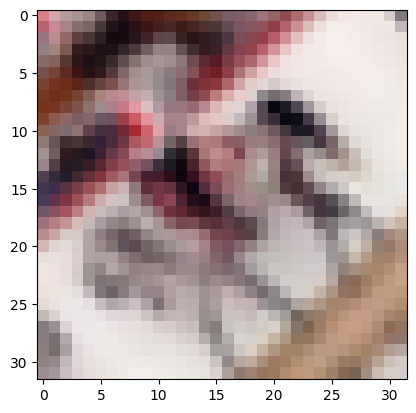

In [ ]:
r = processing(images[0])
plt.imshow(r)

# Optimize data loading and apply preprocessing for the training, validation, and testing datasets

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 32

# Apply preprocessing to datasets
train_dataset = (
    train_data
    .map(preprocess, num_parallel_calls=AUTOTUNE)
    .shuffle(buffer_size=10000)
    .batch(BATCH_SIZE)
    .prefetch(buffer_size=AUTOTUNE)
)

val_dataset = (
    val_data
    .map(lambda x, y: (resize_rescale(x), y), num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(buffer_size=AUTOTUNE)
)

test_dataset = (
    test_data
    .map(lambda x, y: (resize_rescale(x), y), num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(buffer_size=AUTOTUNE)
)


# Build the  Model

In [ ]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),  # Applies 32 filters of size 3x3 to extract features.
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),    # Applies 64 filters of size 3x3 for deeper feature extraction.
    MaxPooling2D((2, 2)),   # reducing the spatial dimensions by half.
    Conv2D(128, (3, 3), activation='relu'),  # Activation function: ReLU (Rectified Linear Unit).
    Flatten(),
    Dense(128, activation='relu'),# 128 neurons
    Dropout(0.5),
    Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Applying Processing - of Image
# Apply resize_rescale and data_augmentation to your training data before feeding it to the model
def preprocess(image, label):
  image = resize_rescale(image)
  image = data_augmentation(image)
  return image, label
 # Apply preprocessing to your datasets
train_data = train_data.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# Converting into batch
BATCH_SIZE = 32  # You can adjust this value based on your system resources
train_data = train_data.batch(BATCH_SIZE)
val_data = val_data.batch(BATCH_SIZE)
test_data = test_data.batch(BATCH_SIZE)

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',  # (Adaptive Moment Estimation).
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
EPOCHS = 3
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,)

Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 102s 76ms/step - accuracy: 0.2094 - loss: 2.0946 - val_accuracy: 0.3266 - val_loss: 1.7804
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 74ms/step - accuracy: 0.3352 - loss: 1.8157 - val_accuracy: 0.3974 - val_loss: 1.6461
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 95s 72ms/step - accuracy: 0.3729 - loss: 1.7237 - val_accuracy: 0.4370 - val_loss: 1.5415


In [ ]:
# loss, acc = model.evaluate(test_data)
# loss, acc

In [ ]:
# evaluate the
acc,loss=model.evaluate(test_data)
acc,loss

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.4055 - loss: 1.6386


(1.6235994100570679, 0.41499999165534973)

# Without Data Augmentation

In [ ]:
(train_data, val_data, test_data), metadata = tfds.load(
    'cifar10',
    split=('train[:80%]', 'train[80%:90%]', 'train[90%:]'),
    with_info=True,
    as_supervised=True,
)

# Get class names
class_names = metadata.features['label'].names
print("Class Names:", class_names)

Class Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
IMG_SIZE = 32  # CIFAR-10 images are already 32x32

def preprocess(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])  # Ensure consistent size (32x32 for CIFAR-10)
    image = tf.cast(image, tf.float32) / 255.0           # Normalize pixel values to [0, 1]
    return image, label

# Apply preprocessing to your datasets
train_data = train_data.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Converting into batch   ( create again)
BATCH_SIZE = 32  # You can adjust this value based on your system res
train_data = train_data.batch(BATCH_SIZE)
val_data = val_data.batch(BATCH_SIZE)
test_data = test_data.batch(BATCH_SIZE)

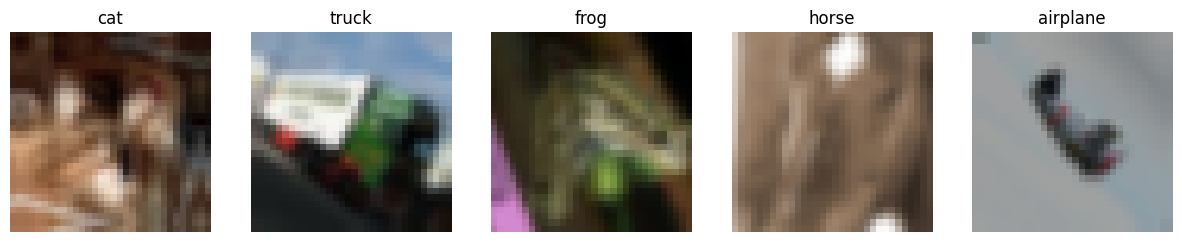

In [ ]:
# Visualize a few images from the training dataset
images, labels = next(iter(train_dataset.take(1)))
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(class_names[labels[i].numpy()])
    ax.axis('off')
plt.show()


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
EPOCHS = 3
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS)

Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 96s 71ms/step - accuracy: 0.2108 - loss: 2.0910 - val_accuracy: 0.3524 - val_loss: 1.7330
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 93s 71ms/step - accuracy: 0.3413 - loss: 1.8170 - val_accuracy: 0.4084 - val_loss: 1.5906
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 147s 75ms/step - accuracy: 0.3746 - loss: 1.7181 - val_accuracy: 0.4390 - val_loss: 1.5450


In [ ]:
# evaluate the
acc,loss=model.evaluate(test_data)
acc,loss

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4270 - loss: 1.5612


(1.5463875532150269, 0.4341999888420105)

# Visualize Training Results

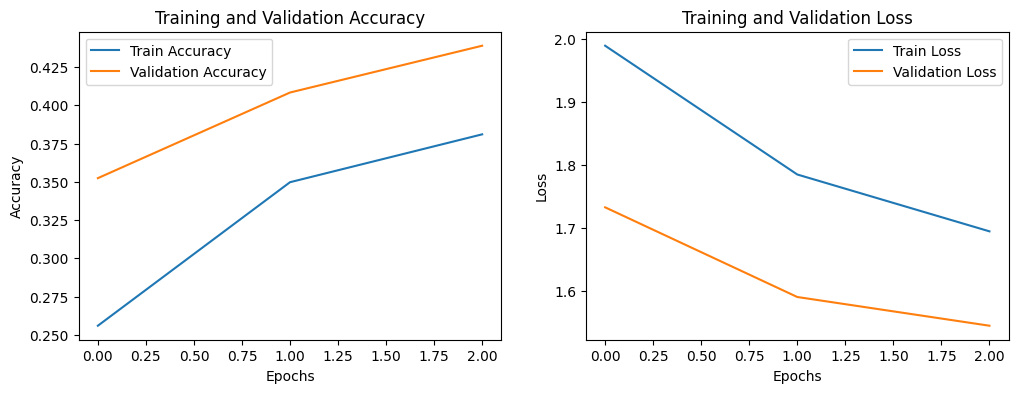

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


# Reading Data From Folder - Train / Validation / Testing folder

In [ ]:
import tensorflow as tf
import pathlib

dataset_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"    # CIFAR-10 dataset URL
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)   # Download and extract the dataset
data_dir = pathlib.Path(archive).with_suffix('')        # Get the path to the extracted directory

#  load the CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# here we create folders like this
'''
 Cifar10_photos/
  airplane/
  automobile/
  bird/
  cat/
  deer/
  dog/
  frog/
  horse/
  ship/
  truck
 '''

'\n Cifar10_photos/\n  airplane/\n  automobile/\n  bird/\n  cat/\n  deer/\n  dog/\n  frog/\n  horse/\n  ship/\n  truck\n '